In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor


c:\Users\Deathnote\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Deathnote\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Deathnote\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df = pd.read_csv('garments_worker_productivity.csv')

In [3]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Information related to data

date : Date in MM-DD-YYYY


quarter : A portion of the month. A month was divided into four quarters


department : Associated department


day : Day of the Week


team : Associated team number


targeted_productivity : Targeted productivity set by the Authority for each team for each day


smv : Standard Minute Value, it is the allocated time for a task


wip : Work in progress. Includes the number of unfinished items for products


over_time : Represents the amount of overtime by each team in minutes


incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.


idle_time : The amount of time when the production was interrupted due to several reasons


idle_men : The number of workers who were idle due to production interruption


no_of_style_change : Number of changes in the style of a particular product


no_of_workers : Number of workers in each team


actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
df.describe(include='all')

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197,1197,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
unique,59,5,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3/11/2015,Quarter1,sweing,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,360,691,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,NaN,NaN,NaN,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,NaN,NaN,NaN,NaN,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,NaN,NaN,NaN,NaN,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,NaN,NaN,NaN,NaN,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,NaN,NaN,NaN,NaN,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253


In [7]:
df.drop(['date', 'targeted_productivity'], axis=1, inplace=True)
df.head()

,quarter,department,day,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [8]:
df = df.rename(columns={
    'team' : 'team_number',
    'smv' : 'time_allocated',
    'wip' : 'unfinished_items',
    'no_of_style_change' : 'style_change'
})
df

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [9]:
df.isna().sum()

quarter                  0
department               0
day                      0
team_number              0
time_allocated           0
unfinished_items       506
over_time                0
incentive                0
idle_time                0
idle_men                 0
style_change             0
no_of_workers            0
actual_productivity      0
dtype: int64

In [10]:
df['unfinished_items'] = df['unfinished_items'].fillna(df['unfinished_items'].mean())

In [11]:
df.isna().sum()

quarter                0
department             0
day                    0
team_number            0
time_allocated         0
unfinished_items       0
over_time              0
incentive              0
idle_time              0
idle_men               0
style_change           0
no_of_workers          0
actual_productivity    0
dtype: int64

In [12]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [13]:
df['quarter'] = df['quarter'].str.replace('Quarter5','Quarter1')


In [14]:
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

In [15]:
# Extract the numerical part from the 'quarter' column
df['quarter'] = df['quarter'].str.extract(r'(\d+)')
df['quarter']

0       1
1       1
2       1
3       1
4       1
       ..
1192    2
1193    2
1194    2
1195    2
1196    2
Name: quarter, Length: 1197, dtype: object

In [16]:
df['quarter'] = df['quarter'].astype(int)

In [17]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [18]:
df['department'] = df['department'].str.replace('sweing','sewing')
df['department'] = df['department'].str.replace('finishing ','finishing')

In [19]:
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [20]:
df['team_number'] = df['team_number'].astype(int)
df['over_time'] = df['over_time'].astype(int)
df['incentive'] = df['incentive'].astype(int)
df['idle_time'] = df['idle_time'].astype(int)
df['idle_men'] = df['idle_men'].astype(int)
df['style_change'] = df['style_change'].astype(int)

In [21]:
df['time_allocated'] = df['time_allocated'].astype(int)
df['time_allocated']

0       26
1        3
2       11
3       11
4       25
        ..
1192     2
1193     3
1194     3
1195     2
1196     2
Name: time_allocated, Length: 1197, dtype: int32

In [22]:
df['unfinished_items'] = df['unfinished_items'].astype(int)
df['unfinished_items']

0       1108
1       1190
2        968
3        968
4       1170
        ... 
1192    1190
1193    1190
1194    1190
1195    1190
1196    1190
Name: unfinished_items, Length: 1197, dtype: int32

In [23]:
df['idle_time'] = df['idle_time'].astype(int)
df['idle_time']

0       0
1       0
2       0
3       0
4       0
       ..
1192    0
1193    0
1194    0
1195    0
1196    0
Name: idle_time, Length: 1197, dtype: int32

In [24]:
df['no_of_workers'] = df['no_of_workers'].astype(int)
df['no_of_workers']

0       59
1        8
2       30
3       30
4       56
        ..
1192     8
1193     8
1194     8
1195    15
1196     6
Name: no_of_workers, Length: 1197, dtype: int32

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   quarter              1197 non-null   int32  
 1   department           1197 non-null   object 
 2   day                  1197 non-null   object 
 3   team_number          1197 non-null   int32  
 4   time_allocated       1197 non-null   int32  
 5   unfinished_items     1197 non-null   int32  
 6   over_time            1197 non-null   int32  
 7   incentive            1197 non-null   int32  
 8   idle_time            1197 non-null   int32  
 9   idle_men             1197 non-null   int32  
 10  style_change         1197 non-null   int32  
 11  no_of_workers        1197 non-null   int32  
 12  actual_productivity  1197 non-null   float64
dtypes: float64(1), int32(10), object(2)
memory usage: 74.9+ KB


In [26]:
columns = ['team_number','time_allocated','unfinished_items', 'over_time', 'incentive', 'idle_time', 'idle_men','no_of_workers' ]

for i in columns:
    print(i)
    print('minimum value: ', df[i].min())
    print('maximum value: ', df[i].max())
    print('*'*50)

team_number
minimum value:  1
maximum value:  12
**************************************************
time_allocated
minimum value:  2
maximum value:  54
**************************************************
unfinished_items
minimum value:  7
maximum value:  23122
**************************************************
over_time
minimum value:  0
maximum value:  25920
**************************************************
incentive
minimum value:  0
maximum value:  3600
**************************************************
idle_time
minimum value:  0
maximum value:  300
**************************************************
idle_men
minimum value:  0
maximum value:  45
**************************************************
no_of_workers
minimum value:  2
maximum value:  89
**************************************************


# Univariate Analysis

In [27]:
sns.set_style("darkgrid")

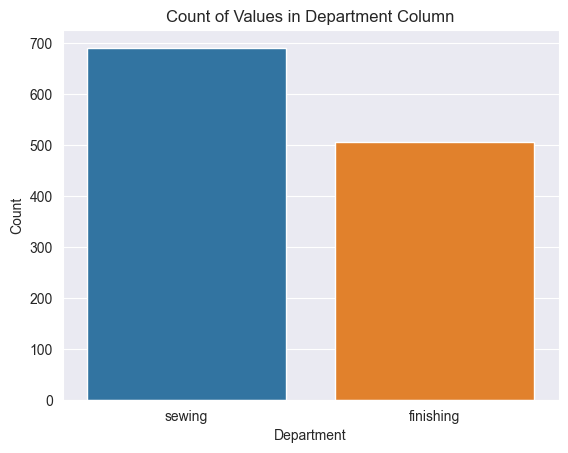

In [28]:
sns.countplot(data=df, x='department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Values in Department Column')
plt.show()

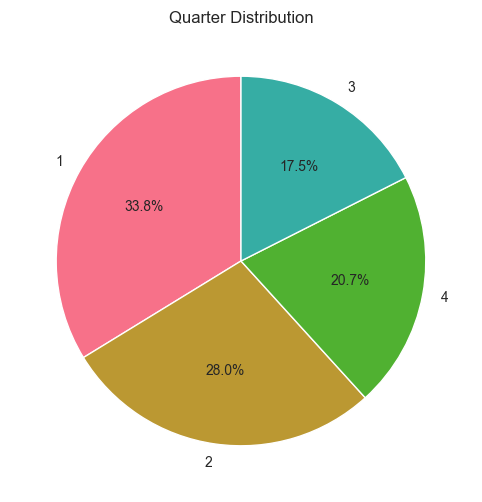

In [29]:
quarter_counts = df['quarter'].value_counts()
plt.figure(figsize=(8, 6))
sns.set_palette("husl")  # Set custom color palette
plt.pie(quarter_counts, labels=quarter_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Quarter Distribution')
plt.show()

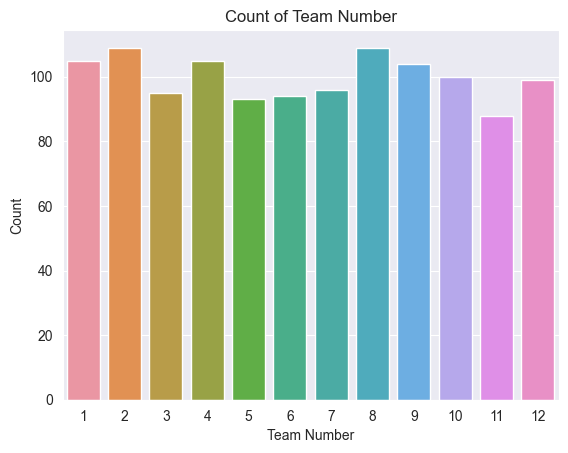

In [30]:
sns.countplot(data=df, x='team_number')
plt.xlabel('Team Number')
plt.ylabel('Count')
plt.title('Count of Team Number')
plt.show()

# Bivariate analysis

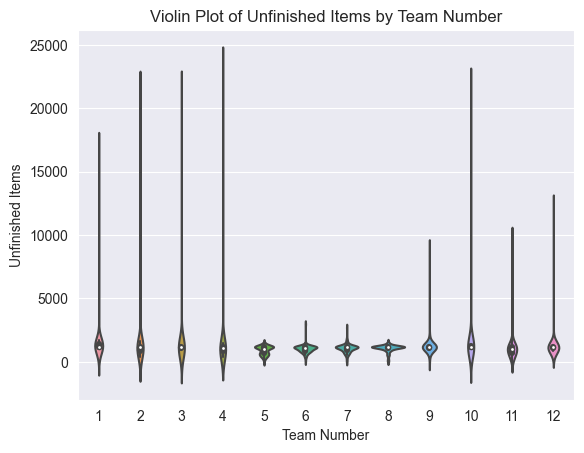

In [31]:
sns.violinplot(data=df, x='team_number', y='unfinished_items')
plt.xlabel('Team Number')
plt.ylabel('Unfinished Items')
plt.title('Violin Plot of Unfinished Items by Team Number')
plt.show()

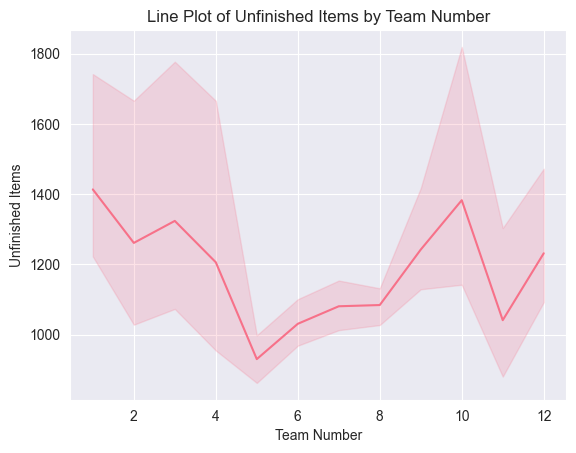

In [32]:
sns.lineplot(data=df, x='team_number', y='unfinished_items')
plt.xlabel('Team Number')
plt.ylabel('Unfinished Items')
plt.title('Line Plot of Unfinished Items by Team Number')
plt.show()

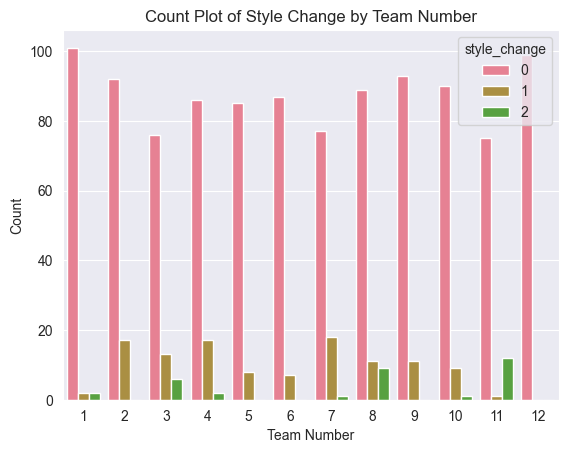

In [33]:
sns.countplot(data=df, x='team_number', hue='style_change')
plt.xlabel('Team Number')
plt.ylabel('Count')
plt.title('Count Plot of Style Change by Team Number')
plt.show()

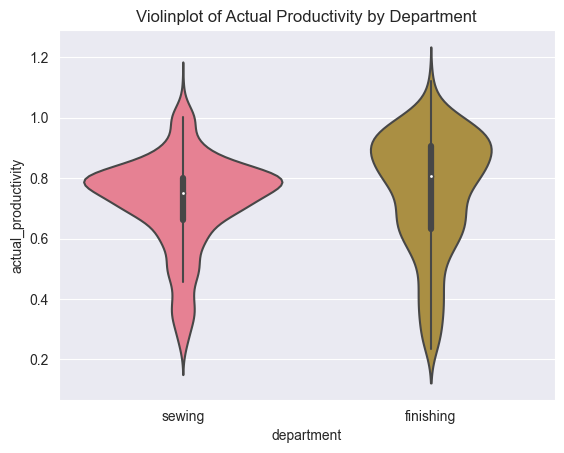

In [34]:
# Create violinplots for numerical variables by department
sns.violinplot(data=df, x='department', y='actual_productivity')
plt.title('Violinplot of Actual Productivity by Department')
plt.show()

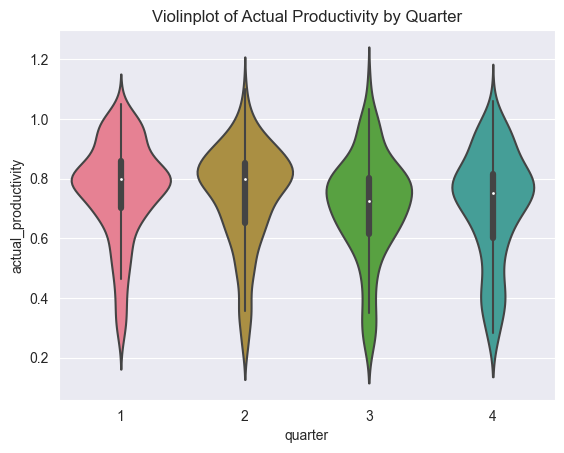

In [35]:
# Create violinplots for numerical variables by quarter
sns.violinplot(data=df, x='quarter', y='actual_productivity')
plt.title('Violinplot of Actual Productivity by Quarter')
plt.show()

# Multivariate Analysis

C:\Users\Deathnote\AppData\Local\Temp\ipykernel_25616\3886144492.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


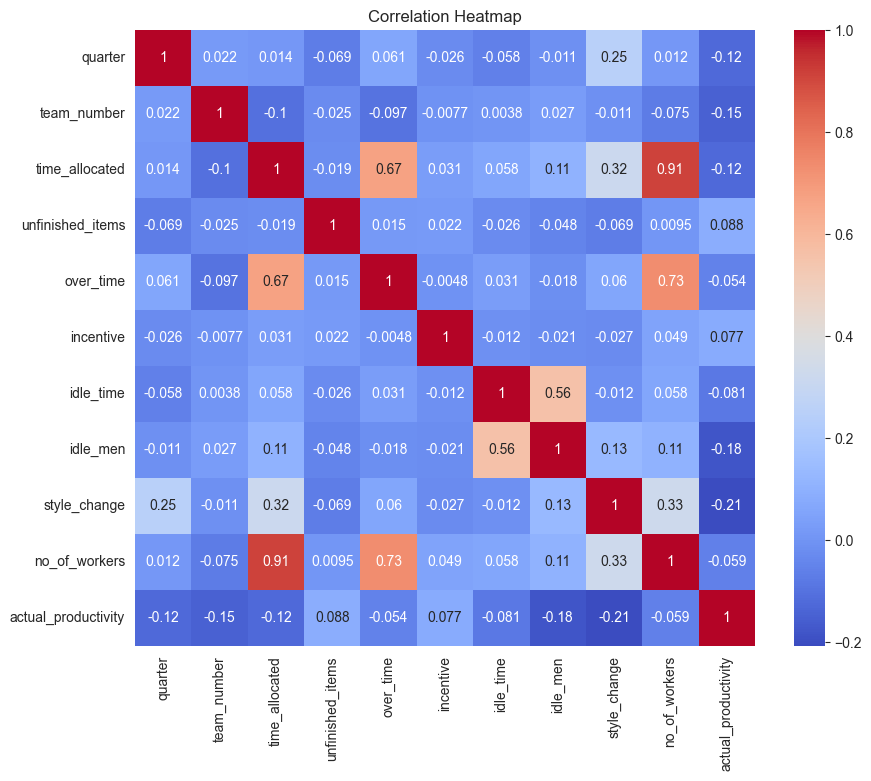

In [36]:
# Create a heatmap of correlation between numerical variables with a larger size
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
lc = LabelEncoder()

In [38]:
print('Before encoding: ', df['department'].unique())
df['department'] = lc.fit_transform(df['department'])
print('After encoding: ',df['department'].unique())

Before encoding:  ['sewing' 'finishing']
After encoding:  [1 0]


In [39]:
print('Before encoding: ', df['day'].unique())
df['day'] = lc.fit_transform(df['day'])
print('After encoding: ',df['day'].unique())

Before encoding:  ['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
After encoding:  [3 1 2 0 4 5]


# Buiding the model for Prediction

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   quarter              1197 non-null   int32  
 1   department           1197 non-null   int32  
 2   day                  1197 non-null   int32  
 3   team_number          1197 non-null   int32  
 4   time_allocated       1197 non-null   int32  
 5   unfinished_items     1197 non-null   int32  
 6   over_time            1197 non-null   int32  
 7   incentive            1197 non-null   int32  
 8   idle_time            1197 non-null   int32  
 9   idle_men             1197 non-null   int32  
 10  style_change         1197 non-null   int32  
 11  no_of_workers        1197 non-null   int32  
 12  actual_productivity  1197 non-null   float64
dtypes: float64(1), int32(12)
memory usage: 65.6 KB


In [41]:
# X consists of independent variables
X = df.drop(['actual_productivity'],axis=1)
X

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers
0,1,1,3,8,26,1108,7080,98,0,0,0,59
1,1,0,3,1,3,1190,960,0,0,0,0,8
2,1,1,3,11,11,968,3660,50,0,0,0,30
3,1,1,3,12,11,968,3660,50,0,0,0,30
4,1,1,3,6,25,1170,1920,50,0,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,2,0,5,10,2,1190,960,0,0,0,0,8
1193,2,0,5,8,3,1190,960,0,0,0,0,8
1194,2,0,5,7,3,1190,960,0,0,0,0,8
1195,2,0,5,9,2,1190,1800,0,0,0,0,15


In [42]:
col = X.columns
col

Index(['quarter', 'department', 'day', 'team_number', 'time_allocated',
       'unfinished_items', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'style_change', 'no_of_workers'],
      dtype='object')

In [43]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-1.10773621,  0.85572897,  0.27151595, ..., -0.11300466,
        -0.3516175 ,  1.10410904],
       [-1.10773621, -1.1685943 ,  0.27151595, ..., -0.11300466,
        -0.3516175 , -1.19907034],
       [-1.10773621,  0.85572897,  0.27151595, ..., -0.11300466,
        -0.3516175 , -0.20554198],
       ...,
       [-0.22317301, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -1.19907034],
       [-0.22317301, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -0.88294768],
       [-0.22317301, -1.1685943 ,  1.43849833, ..., -0.11300466,
        -0.3516175 , -1.2893911 ]])

In [44]:
X_scaled = pd.DataFrame(X_scaled,columns=col)
X_scaled

,quarter,department,day,team_number,time_allocated,unfinished_items,over_time,incentive,idle_time,idle_men,style_change,no_of_workers
0,-1.107736,0.855729,0.271516,0.454323,1.038707,-0.058971,0.750589,0.373414,-0.057278,-0.113005,-0.351617,1.104109
1,-1.107736,-1.168594,0.271516,-1.567329,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
2,-1.107736,0.855729,0.271516,1.320745,-0.317162,-0.159325,-0.271092,0.073631,-0.057278,-0.113005,-0.351617,-0.205542
3,-1.107736,0.855729,0.271516,1.609552,-0.317162,-0.159325,-0.271092,0.073631,-0.057278,-0.113005,-0.351617,-0.205542
4,-1.107736,0.855729,0.271516,-0.123292,0.948316,-0.014529,-0.790895,0.073631,-0.057278,-0.113005,-0.351617,0.968628
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,-0.223173,-1.168594,1.438498,1.031937,-1.130684,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1193,-0.223173,-1.168594,1.438498,0.454323,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1194,-0.223173,-1.168594,1.438498,0.165515,-1.040293,-0.000193,-1.077682,-0.238643,-0.057278,-0.113005,-0.351617,-1.199070
1195,-0.223173,-1.168594,1.438498,0.743130,-1.130684,-0.000193,-0.826743,-0.238643,-0.057278,-0.113005,-0.351617,-0.882948


In [45]:
y = df['actual_productivity']
y

0       0.940725
1       0.886500
2       0.800570
3       0.800570
4       0.800382
          ...   
1192    0.628333
1193    0.625625
1194    0.625625
1195    0.505889
1196    0.394722
Name: actual_productivity, Length: 1197, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(957, 12)
(240, 12)
(957,)
(240,)


# Linear Regression

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
predict_train = lr.predict(X_train)

In [49]:
# training score
mse = mean_squared_error(y_train, predict_train)
rmse_lr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_train)

Root Mean Squared Error: 0.16226529653729893


In [50]:
predict_test = lr.predict(X_test)

In [51]:
# testing score
mse = mean_squared_error(y_test, predict_test)
rmse_lr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_lr_test)

Root Mean Squared Error: 0.16116562949494187


# Random Forest

In [52]:
rfr = RandomForestRegressor(n_estimators = 100,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, max_features=0.8,
                      min_weight_fraction_leaf=0.05, random_state=42)

In [53]:
predict_train_rfr = rfr.predict(X_train)

In [54]:
# training score
mse = mean_squared_error(y_train, predict_train_rfr)
rmse_rfr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_train)

Root Mean Squared Error: 0.13066329578222882


In [55]:
predict_test_rfr = rfr.predict(X_test)

In [56]:
# testing score
mse = mean_squared_error(y_test, predict_test_rfr)
rmse_rfr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_rfr_test)

Root Mean Squared Error: 0.12721255996349562


# Decision Tree

In [57]:
dtr = DecisionTreeRegressor(max_depth= 4, min_samples_split= 3, min_samples_leaf= 2)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=3)

In [58]:
predict_train_dtr = dtr.predict(X_train)

In [59]:
# training score
mse = mean_squared_error(y_train, predict_train_dtr)
rmse_dtr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_train)

Root Mean Squared Error: 0.13187559206436333


In [60]:
predict_test_dtr = dtr.predict(X_test)

In [61]:
# testing score
mse = mean_squared_error(y_test, predict_test_dtr)
rmse_dtr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_dtr_test)

Root Mean Squared Error: 0.12918875831022705


# Gradient Boosting Regressor

In [62]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [63]:
predict_train_gbr = gbr.predict(X_train)

In [64]:
# training score
mse = mean_squared_error(y_train, predict_train_gbr)
rmse_gbr_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_train)

Root Mean Squared Error: 0.14244277376076936


In [65]:
predict_test_gbr = gbr.predict(X_test)

In [66]:
# testing score
mse = mean_squared_error(y_test, predict_test_gbr)
rmse_gbr_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_gbr_test)

Root Mean Squared Error: 0.1394815884261522


# Xtreme Gradient Boost

In [67]:
#xgb = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=2, subsample=0.7,
                    #colsample_bytree=0.4,colsample_bylevel = 0.5,
                   #max_leaves = 2, random_state = 1)
#xgb.fit(X_train, y_train)

In [68]:
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05,
                   max_leaves = 3, random_state = 1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=3,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

In [69]:
predict_train_xgb = xgb.predict(X_train)

In [70]:
# training score
mse = mean_squared_error(y_train, predict_train_xgb)
rmse_xgb_train = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_train)

Root Mean Squared Error: 0.057574476336590054


In [71]:
predict_test_xgb = xgb.predict(X_test)

In [72]:
# testing score
mse = mean_squared_error(y_test, predict_test_xgb)
rmse_xgb_test = np.sqrt(mse)
print('Root Mean Squared Error:', rmse_xgb_test)

Root Mean Squared Error: 0.12343275775750703


# Bagging

In [73]:

# Define base model
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06, max_depth=2, max_leaves=3, random_state=1)

# Create bagging regressor
bagging_reg = BaggingRegressor(base_model, n_estimators=100, random_state=42)


# Fit bagging regressor
bagging_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = bagging_reg.predict(X_train)
y_test_pred = bagging_reg.predict(X_test)

# Evaluate performance
train_rmse_b = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_b = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Bagging Regressor:")
print(f"Training RMSE: {train_rmse_b}")
print(f"Testing RMSE: {test_rmse_b}")

Bagging Regressor:
Training RMSE: 0.11003378916688866
Testing RMSE: 0.11605208654607595


# Boosting

In [74]:
# Define base model
base_model = XGBRegressor(n_estimators=700, learning_rate=0.06, max_depth=2, max_leaves=3, random_state=1)

# Create AdaBoost regressor
boosting_reg = AdaBoostRegressor(base_model, n_estimators=100, learning_rate=0.1, random_state=42)

# Fit AdaBoost regressor
boosting_reg.fit(X_train, y_train)

# Make predictions
y_train_pred = boosting_reg.predict(X_train)
y_test_pred = boosting_reg.predict(X_test)

# Evaluate performance
train_rmse_bo = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse_bo = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("AdaBoost Regressor:")
print(f"Training RMSE: {train_rmse_bo}")
print(f"Testing RMSE: {test_rmse_bo}")


AdaBoost Regressor:
Training RMSE: 0.1075964215336082
Testing RMSE: 0.1297762247652773


In [75]:
results = pd.DataFrame(columns=['Model', 'Training RMSE', 'Testing RMSE'])
results.loc[0] = ['Linear Regression', rmse_lr_train, rmse_lr_test]
results.loc[1] = ['Decision Tree Regressor', rmse_dtr_train, rmse_dtr_test]
results.loc[2] = ['Random Forest Regressor', rmse_rfr_train, rmse_rfr_test]
results.loc[3] = ['Gradient Boosting Regressor', rmse_gbr_train, rmse_gbr_test]
results.loc[4] = ['XG Boost Regressor', rmse_xgb_train, rmse_xgb_test]
results.loc[5] = ['Bagging Regressor', train_rmse_b, test_rmse_b]
results.loc[6] = ['Boosting Regressor', train_rmse_bo, test_rmse_bo]


print(results)

                         Model  Training RMSE  Testing RMSE
0            Linear Regression       0.162265      0.161166
1      Decision Tree Regressor       0.131876      0.129189
2      Random Forest Regressor       0.130663      0.127213
3  Gradient Boosting Regressor       0.142443      0.139482
4           XG Boost Regressor       0.057574      0.123433
5            Bagging Regressor       0.110034      0.116052
6           Boosting Regressor       0.107596      0.129776


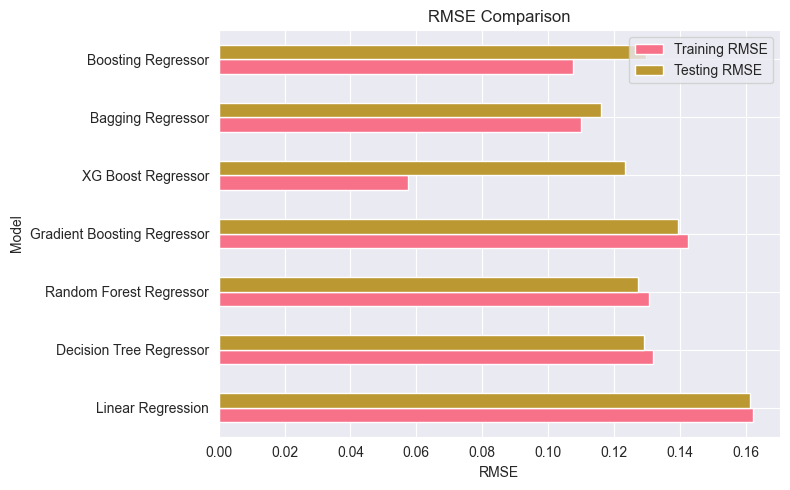

In [76]:
fig, ax = plt.subplots(figsize=(8, 5))
results.plot(x='Model', y=['Training RMSE', 'Testing RMSE'], kind='barh', ax=ax)
ax.set_xlabel('RMSE')
ax.set_title('RMSE Comparison')
plt.tight_layout()
plt.show()

In [77]:
prediction = bagging_reg.predict(pd.DataFrame([[1,0,3,1,3,1190,960,0,0,0,0,8]], columns= ['quarter', 'department', 'day', 'team_number', 'time_allocated', 'unfinished_items',
       'over_time', 'incentive','idle_time','idle_men','style_change', 'no_of_workers']))

prediction

array([0.8105496], dtype=float32)

In [78]:
# dumping the selected model
pickle.dump(boosting_reg,open('productivity.pkl','wb'))